# Importing Libraries for Cleaning the Data

In [2]:
# numpy is useful for making arrays and handling numerical data
# pandas is used to create the dataframe
import pandas as pd
import numpy as np

# Data Collection and Processing

In [4]:
# importing the dataset into a dataframe
data = pd.read_csv('Bengaluru_House_Data.csv')

In [5]:
# prints only the top five rows of the dataframe by default
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Cleaning data in entire dataframe

In [7]:
# prints all the required information about the dataframe
# like number of rows and columns, number of non-null values, datypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
# dropping the unnecessary columns from the dataframe
data.drop(columns=['area_type', 'availability', 'society'], inplace=True)

In [9]:
# checking the dataframe again after dropping
data.head(20)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,Whitefield,2 BHK,1170,2.0,1.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,NaN,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,NaN,600.00
8,Marathahalli,3 BHK,1310,3.0,1.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,NaN,370.00


In [10]:
# the dataframe seems to be fine
# dropping the null values or missing values if any
data.dropna(inplace=True)

In [11]:
# shows the entire dataframe
# typically first 5 rows and last five rows are displayed
data

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


### Cleaning 'location' data

In [13]:
# find distinct values of each column in the cleaned dataset
data.location.value_counts()

location
Whitefield            514
Sarjapur  Road        372
Electronic City       300
Kanakpura Road        261
Thanisandra           231
                     ... 
Milk Colony             1
Sundara Nagar           1
Jaladarsini Layout      1
Madanayakahalli         1
Abshot Layout           1
Name: count, Length: 1265, dtype: int64

In [14]:
# remove spaces before and after the location names if any
data['location'] = data['location'].apply(lambda x:x.strip())
# locations 
data.location.value_counts()

location
Whitefield          515
Sarjapur  Road      372
Electronic City     302
Kanakpura Road      261
Thanisandra         234
                   ... 
Shirdi Sai Nagar      1
S R Layout            1
Meenakshi Layout      1
Vidyapeeta            1
Abshot Layout         1
Name: count, Length: 1254, dtype: int64

In [15]:
# group the data by location only and the count of distinct locations
# sort in descending order
# display locations having count=10 and less than 10
location_stats = data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_less_than_10_entries = location_stats[location_stats <= 10]
location_less_than_10_entries

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1017, dtype: int64

In [16]:
# replace these locations with "others"
# this makes dataframe more balanced
data['location'] = data['location'].apply(lambda x:'other' if x in location_less_than_10_entries else x)
data['location'].value_counts()

location
other                        2739
Whitefield                    515
Sarjapur  Road                372
Electronic City               302
Kanakpura Road                261
                             ... 
Marsur                         11
LB Shastri Nagar               11
2nd Phase Judicial Layout      11
ISRO Layout                    11
Vishveshwarya Layout           11
Name: count, Length: 238, dtype: int64

In [17]:
data

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


### Cleaning 'size' data

In [19]:
# displays the unique values in size column
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [20]:
# split data and extract only the numeric values into a new 'bedrooms' column
# since the data in the size column does not follow one pattern
data['bedrooms'] = data['size'].apply(lambda x:int(x.split(' ')[0]))
data

,location,size,total_sqft,bath,balcony,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


### Cleaning 'total_sqft' data

In [22]:
# notice the range of data 1133 - 1384
# this needs to be cleaned too
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
# function to take the average of the two numbers
# split the string by '-' and then aggregate them
def clean(sqft):
    tokens = sqft.split('-')
    if len(tokens)==2:
        return (float(tokens[0]) + float(tokens[1]))/2
    else:
        try:
            return float(sqft)
        except:
            return None

In [24]:
# testing if the function works
# check with no range value, it should return only the value in float 
#clean('200')

In [25]:
# check with a range value, it should return the average of the two numbers
#clean('100 - 200')

In [26]:
# check with string, it should return None
#clean('nila')

In [27]:
#apply the function to the total_sqft column
data['total_sqft'] = data['total_sqft'].apply(clean)
data['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [28]:
# checking the number of entries in each column
data.describe()

,total_sqft,bath,balcony,price,bedrooms
count,12668.000000,12710.000000,12710.000000,12710.000000,12710.000000
mean,1511.835167,2.617309,1.584343,106.060778,2.737136
std,1162.097276,1.226000,0.817287,131.766089,1.205097
min,5.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,49.030000,2.000000
50%,1260.000000,2.000000,2.000000,70.000000,3.000000
75%,1640.000000,3.000000,2.000000,115.000000,3.000000
max,52272.000000,40.000000,3.000000,2912.000000,43.000000


In [29]:
# total_sqft has less number of entries when compared to the other columns
# as seen in the 'count' criteria
# this is because some values in the total_sqft column were changed to None
# remove those missing values from the dataset
data.dropna(inplace=True)
data.describe()

,total_sqft,bath,balcony,price,bedrooms
count,12668.000000,12668.000000,12668.000000,12668.000000,12668.000000
mean,1511.835167,2.616277,1.585649,105.952648,2.736422
std,1162.097276,1.223882,0.816758,131.813137,1.202643
min,5.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,49.015000,2.000000
50%,1260.000000,2.000000,2.000000,70.000000,3.000000
75%,1640.000000,3.000000,2.000000,115.000000,3.000000
max,52272.000000,40.000000,3.000000,2912.000000,43.000000


In [30]:
# divide total_sqft with the number of bedrooms
# this will give the sqft of each bedroom
data['sqft_per_bed'] = data['total_sqft']/data['bedrooms']
data.sqft_per_bed.describe()

count    12668.000000
mean       570.060291
std        380.298999
min          0.714286
25%        473.333333
50%        550.000000
75%        622.500000
max      26136.000000
Name: sqft_per_bed, dtype: float64

In [31]:
# notice the minimum value, it is unreasonable
# applying a filter condition where the minimum value should be >300sqft
data2 = data[data['sqft_per_bed'] >= 300]
data2

,location,size,total_sqft,bath,balcony,price,bedrooms,sqft_per_bed
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,528.000000
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,650.000000
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,480.000000
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,507.000000
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,600.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,571.666667
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,690.600000
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,570.500000
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,1172.250000


In [32]:
# use this for price per sqft and round it off to 2 digits decimal
# to avoid 'SettingWithCopyWarning' use .copy
# since 'data2' is a slice of 'data' dataframe
data2 = data2.copy()
data2['price_per_sqft'] = round(data2['price']*100000/data2['total_sqft'],2)
data2

,location,size,total_sqft,bath,balcony,price,bedrooms,sqft_per_bed,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,528.000000,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,650.000000,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,480.000000,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,507.000000,6245.89
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,600.000000,4250.00
...,...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,571.666667,6530.61
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,690.600000,6689.83
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,570.500000,5258.55
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,1172.250000,10407.34


In [33]:
data2.price_per_sqft.describe()

count     12013.000000
mean       6206.082361
std        3985.518849
min         267.830000
25%        4199.360000
50%        5252.530000
75%        6823.530000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [34]:
# notice the minimum value, again Rs.267 is an unreasonable price for 1sqft
# let's take minimum value be atleast Rs.2000 per sqft
data3 = data2[data2['price_per_sqft'] >= 2000]
data3

,location,size,total_sqft,bath,balcony,price,bedrooms,sqft_per_bed,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,528.000000,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,650.000000,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,480.000000,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,507.000000,6245.89
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,600.000000,4250.00
...,...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,571.666667,6530.61
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,690.600000,6689.83
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,570.500000,5258.55
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,1172.250000,10407.34


In [35]:
# drop unnecessary columns now before fitting them into the model
# 'size' is used as 'bedrooms'
# 'sqft_per_bed' and 'price_per_sqft' were used only to remove outliers
data3 = data3.copy()
data3.drop(columns = ['size', 'sqft_per_bed', 'price_per_sqft'], axis=1, inplace=True)
data3

,location,total_sqft,bath,balcony,price,bedrooms
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


# Creation of Model
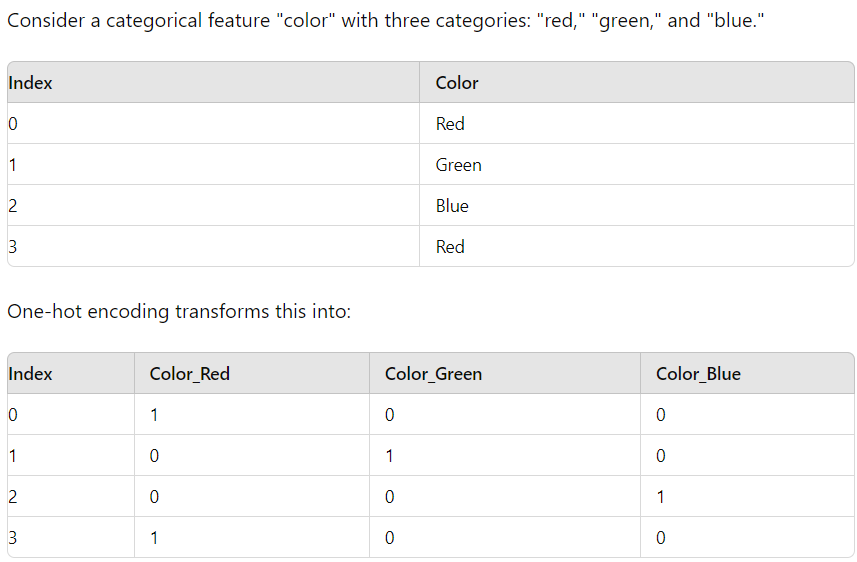

In [37]:
# 'OneHotEncoder' transforms categorical values into binary vectors
# 'StandardScaler' standardizes features by removing the mean and scaling to unit variance
# 'train_test_split' splits the dataset into training and testing sets
# 'LinearRegression' implements a linear regression model
# 'make_pipeline' combines all the steps needed to prepare data and train the model into one organized sequence
# 'make_column_transformer' specifies which preprocessing steps to apply to which columns in a dataset of mixed features
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [38]:
# transforms the 'location' column without producing a sparse matrix
# Sparse matrix: (3,0) 1.0 - in the fourth row (index 3), the first column (Color_Red) has a value of 1.0
# remainder='passthrough' tells the transformer to leave all the other columns unchanged 
# and pass them through the model as it is
col_trans = make_column_transformer((OneHotEncoder(sparse_output=False),['location']), remainder='passthrough')

In [39]:
# creating an object 'lr' that represents a linear regression model
# the LinearRegression class's __init__ method is called
# use dir(sklearn.linear_model) or help(sklearn.linear_model) for module description
lr = LinearRegression()

In [40]:
scaler = StandardScaler()

In [41]:
model = make_pipeline(col_trans, scaler, lr)

In [42]:
# split the data as input data to the model and output data from the model
data_input = data3.drop(columns = ['price'])
data_output = data3['price']

In [43]:
# split the input and output data into training and testing data this time
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.2)

In [44]:
# fitting the training data into the model
model.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [45]:
# checking the model accuracy score
model.score(x_test, y_test)

0.6739547631208698

# Testing the Model

In [47]:
# entering input data
input = pd.DataFrame([['Electronic City Phase II',2000.0,3.0,2.0,3]], columns=['location','total_sqft','bath','balcony','bedrooms'])

In [48]:
#predict house price
model.predict(input)

array([133.7321366])

# Saving the Trained Model

In [50]:
# used for serializing and deserializing Python objects
# serialization converts a Python object into a byte stream
# deserialization converts a byte stream back into a Python object
import pickle as pk

In [51]:
# pickle.dump() function takes the model object 
# and converts it into a binary format suitable for storage
pk.dump(model, open('House_Price_Prediction_Model.pkl','wb'))

In [52]:
# to_csv() is provided by pandas DataFrames, writes the DataFrame to a CSV file
data3.to_csv('Cleaned_House_Data.csv')